# News Headlines Sentiment

Use the news api to pull the latest news articles for Top Ship and Nikola and create a DataFrame of sentiment scores for each stock. 

Use descriptive statistics to answer the following questions:
1. Which stock had the highest mean positive score?
2. Which stock had the highest negative score?
3. Which stock had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline
load_dotenv()

Python-dotenv could not parse statement starting at line 6


True

In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
NewsAPI = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
NKLA_Headlines = NewsAPI.get_everything(
        q="Nikola",
        language= "en",
        sort_by="relevancy"
)
print(f"Total Articles about Nikola: {NKLA_Headlines['totalResults']}")
NKLA_Headlines["articles"][0]

Total Articles about Nikola: 1468


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Matt Burns',
 'title': 'Nikola’s stock crashes after announcing cancelation of contract with Republic Services for 2,500 garbage trucks',
 'description': 'The undoing of Nikola continues. Today, the company announced the termination of its contract with Republic Services for 2,500 garbage trucks. Announced back in August, the deal had Nikola building garbage trucks in 2023 with on-road testing scheduled for 202…',
 'url': 'http://techcrunch.com/2020/12/23/nikolas-stock-crashes-after-announcing-cancelation-of-contract-with-republic-services-for-2500-garbage-trucks/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/08/nikola-refuse.jpg?w=711',
 'publishedAt': '2020-12-23T14:07:38Z',
 'content': 'The undoing of Nikola continues. Today, the company announced the termination of its contract with Republic Services for 2,500 garbage trucks. Announced back in August, the deal had Nikola building g… [+1753 chars]'

In [8]:
# Fetch the Ethereum news articles
Apple_Headlines = NewsAPI.get_everything(
        q="Apple",
        language= "en",
        sort_by="relevancy"
)
print(f"Total Articles about Apple: {Apple_Headlines['totalResults']}")
Apple_Headlines["articles"][0]

Total Articles about Apple: 37357


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Cherlynn Low',
 'title': 'Two weeks with Apple Fitness+',
 'description': 'I’m at the stage of my pandemic fitness routine where if I finish a workout without having yelled in frustration, I have to wonder if the session was too easy. Whether it’s because I’ve grown bored or I’m getting stronger, I’ve struggled to find exercise vide…',
 'url': 'https://www.engadget.com/apple-fitness-plus-review-two-weeks-test-watch-music-workout-160058155.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-12%2F01953680-4aee-11eb-acfb-589043d0b91b&client=amp-blogside-v2&signature=62e57f529183d8248c2b9e8a568eafc3d27c4f0d',
 'publishedAt': '2020-12-31T16:15:58Z',
 'content': 'That’s something you won’t find on services from Fitbit and Samsung, which also offer workout content alongside their wearables. Similar to Fi

In [9]:
# Create the Bitcoin sentiment scores DataFrame
NKLA_Sentiment_Scores_DF = pd.DataFrame.from_dict(NKLA_Headlines["articles"])
NKLA_Sentiment_Scores_DF.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Matt Burns,Nikola’s stock crashes after announcing cancel...,"The undoing of Nikola continues. Today, the co...",http://techcrunch.com/2020/12/23/nikolas-stock...,https://techcrunch.com/wp-content/uploads/2020...,2020-12-23T14:07:38Z,"The undoing of Nikola continues. Today, the co..."
1,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Kirsten Korosec,Nikola shares drop as GM pulls plug on investm...,GM is backing away from an agreement to take a...,http://techcrunch.com/2020/11/30/nikla-shares-...,https://techcrunch.com/wp-content/uploads/2018...,2020-11-30T14:36:30Z,GM is backing away from an agreement to take a...
2,"{'id': 'reuters', 'name': 'Reuters'}",Ben Klayman,"GM, Nikola announce reworked agreement; Nikola...",General Motors Co and Nikola Corp on Monday an...,https://in.reuters.com/article/gm-nikola-idINK...,https://static.reuters.com/resources/r/?m=02&d...,2020-11-30T15:20:00Z,DETROIT (Reuters) - General Motors Co and Niko...
3,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Editorial,GM renegotiates future with Nikola - Reuters.com,General Motors and Nikola on Monday announced ...,https://www.reuters.com/video/watch/idOVD6RLND7,https://static.reuters.com/resources/r/?d=2020...,2020-11-30T18:35:35Z,Posted \r\nGeneral Motors and Nikola on Monday...
4,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Editorial,GM renegotiates future with Nikola - Reuters,General Motors and Nikola on Monday announced ...,https://www.reuters.com/video/watch/idPCTo?now...,https://ajo.prod.reuters.tv/api/v2/img/5fc5368...,2020-11-30T18:38:17Z,Posted \r\nGeneral Motors and Nikola on Monday...


In [10]:
# Create the ethereum sentiment scores DataFrame
Apple_Sentiment_Scores_DF = pd.DataFrame.from_dict(Apple_Headlines["articles"])
Apple_Sentiment_Scores_DF.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'engadget', 'name': 'Engadget'}",Cherlynn Low,Two weeks with Apple Fitness+,I’m at the stage of my pandemic fitness routin...,https://www.engadget.com/apple-fitness-plus-re...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-12-31T16:15:58Z,That’s something you won’t find on services fr...
1,"{'id': None, 'name': 'Lifehacker.com'}",David Murphy,How to Set Up Google Stadia on iOS if There's ...,"As you recall, Apple runs its App Store with a...",https://lifehacker.com/how-to-set-up-google-st...,https://i.kinja-img.com/gawker-media/image/upl...,2020-12-16T21:00:00Z,"As you recall, Apple runs its App Store with a..."
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Darrell Etherington,Apple Fitness+ launches on December 14,Apple is launching its subscription fitness se...,http://techcrunch.com/2020/12/08/apple-fitness...,https://techcrunch.com/wp-content/uploads/2020...,2020-12-08T14:06:17Z,Apple is launching its subscription fitness se...
3,"{'id': 'engadget', 'name': 'Engadget'}",Kris Holt,Apple's top apps of 2020 highlight quarantine ...,Along with its top podcasts and books of the y...,https://www.engadget.com/apple-best-apps-games...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-12-02T20:25:54Z,"The company noted there was a significant ""tre..."
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Anthony Ha,Daily Crunch: Apple launches Fitness+,"We review Apple Fitness+, Gmail goes down and ...",http://techcrunch.com/2020/12/14/daily-crunch-...,https://techcrunch.com/wp-content/uploads/2020...,2020-12-14T23:08:16Z,"We review Apple Fitness+, Gmail goes down and ..."


In [11]:
# Describe the Nikola Sentiment DataFrame
Nikola_Sentiments = []
for article in NKLA_Headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
        Nikola_Sentiments.append({
            "Date" : article["publishedAt"][:10],
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
        })
    except AttributeError:
        pass
# Create DataFrame
Nikola_Sentiment_DF = pd.DataFrame(Nikola_Sentiments)
# Reorder DataFrame columns
Columns =["Date", "Text", "Compound", "Positive", "Negative", "Neutral"]
Nikola_Sentiments_DF = Nikola_Sentiment_DF[Columns]
Nikola_Sentiments_DF.head()

,Date,Text,Compound,Positive,Negative,Neutral
0,2020-12-23,"The undoing of Nikola continues. Today, the co...",0.0000,0.000,0.00,1.000
1,2020-11-30,GM is backing away from an agreement to take a...,-0.1531,0.149,0.14,0.711
2,2020-11-30,DETROIT (Reuters) - General Motors Co and Niko...,0.4939,0.094,0.00,0.906
3,2020-11-30,Posted \r\nGeneral Motors and Nikola on Monday...,0.6486,0.146,0.00,0.854
4,2020-11-30,Posted \r\nGeneral Motors and Nikola on Monday...,0.6486,0.146,0.00,0.854


In [12]:
# Describe the Apple Sentiment DataFrame
Apple_Sentiments = []
for article in Apple_Headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
        text = article["content"]
        date = article["publishedAt"][:10]
        #sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        Apple_Sentiments.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
        })
    except AttributeError:
        pass
# Create DataFrame
Apple_Sentiments_DF = pd.DataFrame(Apple_Sentiments)
# Reorder DataFrame columns
Columns = ["Date", "Text", "Compound", "Positive", "Negative", "Neutral"]
Apple_Sentiments_DF = Apple_Sentiments_DF[Columns]
Apple_Sentiments_DF.head()

,Date,Text,Compound,Positive,Negative,Neutral
0,2020-12-31,That’s something you won’t find on services fr...,0.2732,0.063,0.0,0.937
1,2020-12-16,"As you recall, Apple runs its App Store with a...",0.0000,0.000,0.0,1.000
2,2020-12-08,Apple is launching its subscription fitness se...,0.2732,0.062,0.0,0.938
3,2020-12-02,"The company noted there was a significant ""tre...",0.5719,0.135,0.0,0.865
4,2020-12-14,"We review Apple Fitness+, Gmail goes down and ...",0.0000,0.000,0.0,1.000


In [13]:
Nikola_Sentiments_DF.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.081515,0.060250,0.039650,0.900050
std,0.413700,0.067239,0.053326,0.083345
min,-0.680800,0.000000,0.000000,0.711000
25%,-0.188825,0.000000,0.000000,0.840000
50%,0.000000,0.026000,0.000000,0.895500
75%,0.439600,0.114250,0.062750,1.000000
max,0.690800,0.188000,0.157000,1.000000


In [14]:
Apple_Sentiments_DF.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.191105,0.065650,0.022700,0.911750
std,0.323130,0.064521,0.029711,0.073394
min,-0.340000,0.000000,0.000000,0.724000
25%,0.000000,0.000000,0.000000,0.878250
50%,0.115350,0.055500,0.000000,0.925500
75%,0.421500,0.087250,0.060250,0.957000
max,0.833800,0.215000,0.070000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum is the highest mean positive score coming to 0.060950

Q: Which coin had the highest negative score?

A: Ethereum had the highest compound score 0.196 compared to BitCoin at 0.075

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score 0.318 compared to BitCoin at 0.174

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
from nltk.corpus import reuters, stopwords

# Code to download corpora
import nltk
nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/miladnazar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     /Users/miladnazar/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/miladnazar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# Expand the default stopwords list if necessary
Additional_Stopwords = [',', '', 'https', 'http', 'btc', 'ha', 'bitcoin', 'to', 'with', 'has', 'char', 'unlike', 'eth', 'u', 'is', 'its', 'has', 'with', 'bringing', 'ethereum', 'said', 'sent', 'found', 'today', 'following', 'announced', 'week', 'basically', 'also', 'weekly']

In [18]:
# Complete the tokenizer function
def tokenizer(Text):
    """Tokenizes text."""
   # Create a list of the words
    Text = word_tokenize(Text)
    
    # Convert the words to lowercase
    Text = [word.lower() for word in Text]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    Text = [regex.sub('', word) for word in Text]
    
    # Remove the stop words
    sw = set(stopwords.words('english') + Additional_Stopwords)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    Text = [lemmatizer.lemmatize(word) for word in Text]
    Text = [word for word in Text if word not in sw]
    return Text

In [19]:
# Create a new tokens column for bitcoin
Nikola_Tokens = []
[Nikola_Tokens.append(tokenizer(Text)) for Text in Nikola_Sentiments_DF.Text]
Nikola_Sentiments_DF['Tokens'] = Nikola_Tokens
Nikola_Sentiments_DF.head()

,Date,Text,Compound,Positive,Negative,Neutral,Tokens
0,2020-12-23,"The undoing of Nikola continues. Today, the co...",0.0000,0.000,0.00,1.000,"[undoing, nikola, continues, company, terminat..."
1,2020-11-30,GM is backing away from an agreement to take a...,-0.1531,0.149,0.14,0.711,"[gm, backing, away, agreement, take, stake, el..."
2,2020-11-30,DETROIT (Reuters) - General Motors Co and Niko...,0.4939,0.094,0.00,0.906,"[detroit, reuters, general, motor, co, nikola,..."
3,2020-11-30,Posted \r\nGeneral Motors and Nikola on Monday...,0.6486,0.146,0.00,0.854,"[posted, general, motor, nikola, monday, rewor..."
4,2020-11-30,Posted \r\nGeneral Motors and Nikola on Monday...,0.6486,0.146,0.00,0.854,"[posted, general, motor, nikola, monday, rewor..."


In [20]:
# Create a new tokens column for ethereum
Apple_Tokens = []
[Apple_Tokens.append(tokenizer(Text)) for Text in Apple_Sentiments_DF.Text]
Apple_Sentiments_DF['Tokens'] = Apple_Tokens
Apple_Sentiments_DF.head()

,Date,Text,Compound,Positive,Negative,Neutral,Tokens
0,2020-12-31,That’s something you won’t find on services fr...,0.2732,0.063,0.0,0.937,"[something, find, service, fitbit, samsung, of..."
1,2020-12-16,"As you recall, Apple runs its App Store with a...",0.0000,0.000,0.0,1.000,"[recall, apple, run, app, store, iron, fist, i..."
2,2020-12-08,Apple is launching its subscription fitness se...,0.2732,0.062,0.0,0.938,"[apple, launching, subscription, fitness, serv..."
3,2020-12-02,"The company noted there was a significant ""tre...",0.5719,0.135,0.0,0.865,"[company, noted, wa, significant, trend, towar..."
4,2020-12-14,"We review Apple Fitness+, Gmail goes down and ...",0.0000,0.000,0.0,1.000,"[review, apple, fitness, gmail, go, pornhub, c..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [21]:
from collections import Counter
from nltk import ngrams

In [22]:
# Generate the Bitcoin N-grams where N=2
Nikola_Bigram_Counts = [Counter(ngrams(Tokens, n=2)) for Tokens in Nikola_Sentiments_DF.Tokens]
dict(Nikola_Bigram_Counts[0].most_common(10))

{('undoing', 'nikola'): 1,
 ('nikola', 'continues'): 1,
 ('continues', 'company'): 1,
 ('company', 'termination'): 1,
 ('termination', 'contract'): 1,
 ('contract', 'republic'): 1,
 ('republic', 'service'): 1,
 ('service', 'garbage'): 1,
 ('garbage', 'truck'): 1,
 ('truck', 'back'): 1}

In [23]:
# Generate the Ethereum N-grams where N=2
Apple_Bigram_Counts = [Counter(ngrams(Tokens, n=2)) for Tokens in Apple_Sentiments_DF.Tokens]
dict(Apple_Bigram_Counts[0].most_common(10))

{('something', 'find'): 1,
 ('find', 'service'): 1,
 ('service', 'fitbit'): 1,
 ('fitbit', 'samsung'): 1,
 ('samsung', 'offer'): 1,
 ('offer', 'workout'): 1,
 ('workout', 'content'): 1,
 ('content', 'alongside'): 1,
 ('alongside', 'wearable'): 1,
 ('wearable', 'similar'): 1}

In [24]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(Tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(Tokens).most_common(N)

In [25]:
# Get the top 10 words for Bitcoin
Top10_Words_Nikola = []
for Tokens in Nikola_Sentiments_DF.Tokens:
    Top10_Words_Nikola += Tokens
token_count(Top10_Words_Nikola, 10)

[('nikola', 23),
 ('reuters', 14),
 ('corp', 9),
 ('truck', 8),
 ('electric', 8),
 ('general', 8),
 ('motor', 8),
 ('company', 7),
 ('share', 7),
 ('agreement', 6)]

In [26]:
# Get the top 10 words for Ethereum
Top10_Words_Apple = []
for Tokens in Apple_Sentiments_DF.Tokens:
    Top10_Words_Apple += Tokens
token_count(Top10_Words_Apple, 10)

[('apple', 23),
 ('company', 7),
 ('service', 5),
 ('fitness', 5),
 ('device', 5),
 ('new', 4),
 ('something', 3),
 ('watch', 3),
 ('december', 3),
 ('wa', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

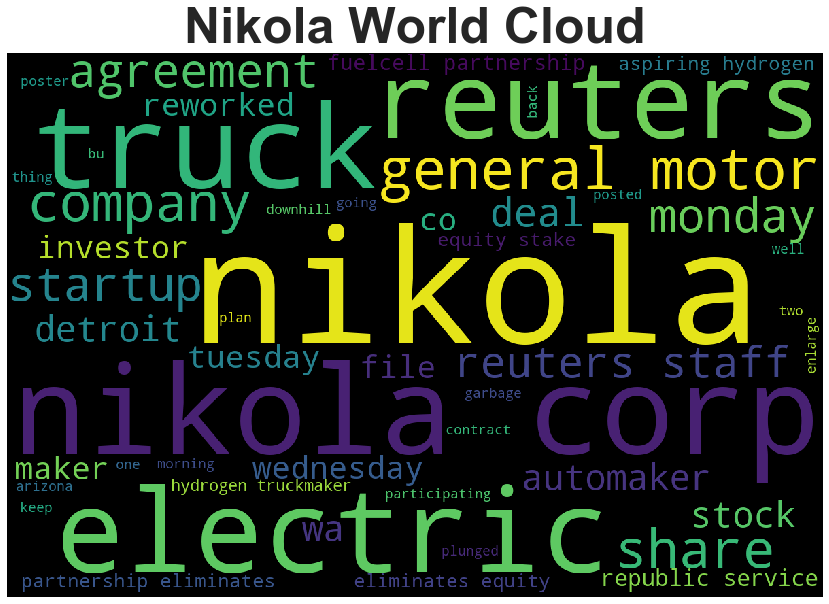

In [28]:
# Generate the Bitcoin word cloud
Nikola_WorldCloud = ' '.join(Top10_Words_Nikola)
wc = WordCloud(width=1200, height=800, max_words=50).generate(Nikola_WorldCloud)
plt.title("Nikola World Cloud", fontsize=50, fontweight="bold")
plt.axis("off")
plt.imshow(wc);

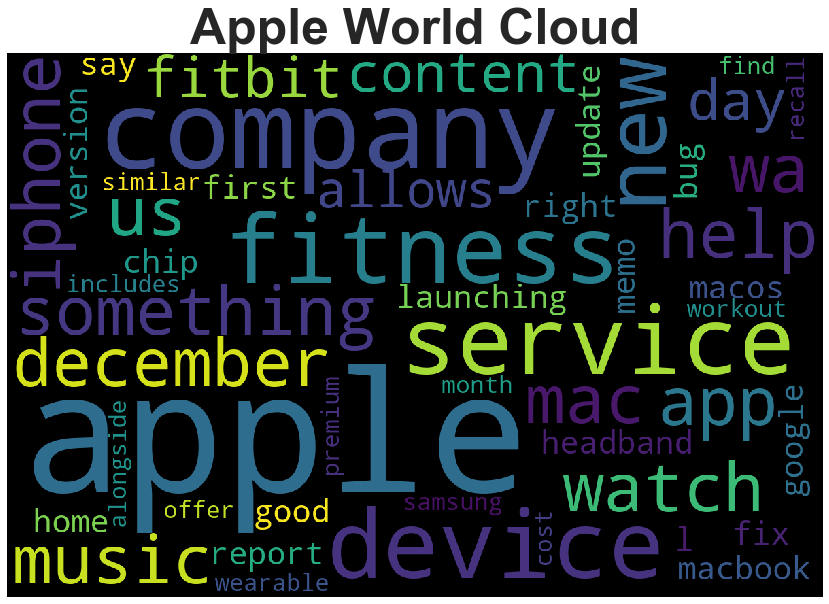

In [29]:
# Generate the Ethereum word cloud
Apple_WorldCloud = ' '.join(Top10_Words_Apple)
wc = WordCloud(width=1200, height=800, max_words=50).generate(Apple_WorldCloud)
plt.title("Apple World Cloud", fontsize=50, fontweight="bold")
plt.axis("off")
plt.imshow(wc);

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [30]:
import spacy
from spacy import displacy

In [31]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Nikola NER

In [33]:
# Concatenate all of the bitcoin text together
Nikola_Corpus = ' '.join(Nikola_Sentiments_DF["Text"].values)
Nikola_Corpus

'The undoing of Nikola continues. Today, the company announced the termination of its contract with Republic Services for 2,500 garbage trucks. Announced back in August, the deal had Nikola building g… [+1753 chars] GM is backing away from an agreement to take a stake in electric automaker Nikola Corp, marking the collapse of a deal that has been problematic since it was announced just two months ago.\r\nShares of… [+2050 chars] DETROIT (Reuters) - General Motors Co and Nikola Corp on Monday announced a reworked agreement on a fuel-cell partnership that eliminates an equity stake in the startup for the Detroit automaker as w… [+2771 chars] Posted \r\nGeneral Motors and Nikola on Monday announced a reworked agreement on a fuel-cell partnership that eliminates an equity stake in the startup for the Detroit automaker as well as plans for bu… [+97 chars] Posted \r\nGeneral Motors and Nikola on Monday announced a reworked agreement on a fuel-cell partnership that eliminates an equity stake 

In [34]:
# Run the NER processor on all of the text
NER_Processor = nlp(Nikola_Corpus)

# Add a title to the document
NER_Processor.user_data["title"] = "All the Article Text on Nikola"

In [35]:
# Render the visualization
displacy.render(NER_Processor, style='ent')

In [36]:
# List all Entities
Nikola_Entities = [ent.text for ent in NER_Processor.ents]
Nikola_Entities_Set = set(Nikola_Entities)
Nikola_Entities[0:10]

['Nikola',
 'Today',
 'Republic Services',
 '2,500',
 'August',
 'Nikola',
 'GM',
 'Nikola Corp',
 'just two months ago',
 'DETROIT']

---

## Apple NER

In [37]:
# Concatenate all of the bitcoin text together
Apple_Corpus = ' '.join(Apple_Sentiments_DF["Text"].values)
Apple_Corpus

'That’s something you won’t find on services from Fitbit and Samsung, which also offer workout content alongside their wearables. Similar to Fitness +, Fitbit Premium costs $10 a month and includes a … [+3957 chars] As you recall, Apple runs its App Store with an iron fist. And itll be a cold day in Cupertino before the company allows game-streaming services to have regular ol appsnot unless the service submits … [+3082 chars] Apple is launching its subscription fitness service, which is built mainly to complement Apple Watch, on December 14. Apple Fitness+ was first announced at Apple’s iPhone event in September, and will… [+2650 chars] The company noted there was a significant "trend towards helpfulness" this year by developers. With that in mind, it recognized five additional apps. Among them are Shine, which added a section "dedi… [+806 chars] We review Apple Fitness+, Gmail goes down and Pornhub cracks down on unverified content. This is your Daily Crunch for December 14, 2020.\r\

In [38]:
# Run the NER processor on all of the text
NER_Processor_Apple = nlp(Apple_Corpus)

# Add a title to the document
NER_Processor_Apple.user_data["title"] = "All the Article Text on Apple"

In [39]:
# Render the visualization
displacy.render(NER_Processor_Apple, style='ent')

In [40]:
# List all Entities
Apple_Entities = [ent.text for ent in NER_Processor_Apple.ents]
Apple_Entities_Set = set(Apple_Entities)
Apple_Entities_Set

{'10',
 '11',
 '9to5Mac',
 'Adobe',
 'AirPods Max',
 'Amazon',
 'App Store',
 'Apple',
 'Apple Arcade',
 'Apple Music',
 'Apple Watch',
 'Brian Heater',
 'Capybara Games',
 'Cupertino',
 'Daily Crunch',
 'December',
 'December 14',
 'December 14, 2020',
 'FTC',
 'Fitbit and Samsung',
 'Fitness +, Fitbit Premium',
 'Gmail',
 'Google',
 'Lens Technology',
 'Lightroom',
 'M1',
 'Mac',
 'MacBook Air',
 'MacBook Pro',
 'Microsoft',
 'Music Memos',
 'One',
 'Pornhub',
 'SOS',
 'September',
 'Shine',
 'Silicon',
 'Sworcery',
 'Sword',
 'Uyghur',
 'Voice Memos',
 'Xinjiang',
 'an M1 Mac',
 'another seven days',
 'first',
 'five',
 'iPhone',
 'it’l',
 'the Federal Trade Commission',
 'the Nintendo Switch',
 'this year',
 'today',
 'two',
 'watchOS',
 'yesterday'}

In [38]:
print("MarkDown")
print("========")
print("Ethereum is the highest mean positive score coming to 0.060950")
print("Ethereum had the highest compound score 0.196 compared to BitCoin at 0.075")
print("Ethereum had the highest positive score 0.318 compared to BitCoin at 0.174")

MarkDown
Ethereum is the highest mean positive score coming to 0.060950
Ethereum had the highest compound score 0.196 compared to BitCoin at 0.075
Ethereum had the highest positive score 0.318 compared to BitCoin at 0.174
